<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Mohammad Ali Olama <br>
   **Student ID**: 98100497 <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.


I use 3 different datasets for this problem :

<br><font color=black size=6>
    Dataset 1: Tesla stock data from 2010 to 2020
    </div>
<br><br>
    
    
   
First, we load the data set.

In [1]:
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("TSLA.csv", sep=",")
  
# display DataFrame
df = df.iloc[: , [1,2,3,6,4]]
df.iloc[:,3] = df.iloc[:,3] / 100000
df

,Open,High,Low,Volume,Close
0,19.000000,25.000000,17.540001,187.663,23.889999
1,25.790001,30.420000,23.299999,171.871,23.830000
2,25.000000,25.920000,20.270000,82.188,21.959999
3,23.000000,23.100000,18.709999,51.398,19.200001
4,20.000000,20.000000,15.830000,68.669,16.110001
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,117.885,566.900024
2412,575.690002,589.799988,567.429993,178.015,580.989990
2413,632.419983,650.880005,618.000000,290.057,640.809998
2414,640.000000,653.000000,632.520020,157.193,650.570007


You can find additional information about this dataset here : [Source](https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020?resource=download)

First, we shuffle the data, then  divide data set into train and test sets and then run linear regression of that.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data

train_features, test_features , train_label , test_label = train_test_split(shuffled_data.loc[:, shuffled_data.columns != 'Close'], shuffled_data['Close'], test_size=0.2, random_state=43)



from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))


intercept is: -0.004032474706662015
models parameters: [-0.65916286  0.90191672  0.75605234 -0.00155656]
MSE of Linear Regression on training set: 4.185
MSE of Linear Regression on test set: 3.857


<br><font color=black size=4>
    Ridge Regression on this data set :
    </div>
<br><br>

In [3]:
from sklearn.linear_model import Ridge

alphas = [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1.0 ,5.0, 10 ,30 , 60 , 100 ,200 , 300,400,500, 1000 , 10000]


minMSE = 10000
maxal = -1
for al in alphas:
    model = Ridge(alpha = al , max_iter = 10000000)

    model.fit(train_features, train_label)
    y_pred_test = model.predict(test_features)
    l1_test = mean_squared_error(test_label, y_pred_test)
    print(l1_test)

    if l1_test < minMSE:
        minMSE = l1_test
        maxal = al
        

print("Best value for alpha: {:.3f}".format(maxal))

model = Ridge(alpha = maxal)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)
l2_test = r2_score(test_label, y_pred_test)
l2_train = r2_score(train_label, y_pred_train)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))


3.856847365459224
3.856847138122389
3.8568468539541434
3.856844580711985
3.8568417394205037
3.8568190195089476
3.856790645671817
3.8565646962234963
3.856284858527308
3.8551942511299093
3.853643804376968
3.851733765331235
3.847723502407467
3.8447644223601234
3.8428069587599616
3.8418040335212917
3.8496164023104256
5.156382880081611
Best value for alpha: 500.000
intercept is: -0.013917483552688736
models parameters: [-0.62163573  0.88711449  0.73325898 -0.00164288]
MSE of Linear Regression on training set: 4.199
MSE of Linear Regression on test set: 3.842


<br><font color=black size=4>
    Lasso Regression on this data set :
    </div>
<br><br>

In [4]:
from sklearn.linear_model import Lasso

alphas = alphas = [0.001 , 0.003 , 0.01 , 0.03 , 0.1 , 0.3 ,1,3,10,30, 100,300,1000,3000]


minMSE = 10000
maxal = -1
for al in alphas:
    model = Lasso(alpha = al , max_iter=100000)

    model.fit(train_features, train_label)
    y_pred_test = model.predict(test_features)
    l1_test = mean_squared_error(test_label, y_pred_test)
    print(l1_test)

    if l1_test < minMSE:
        minMSE = l1_test
        maxal = al
        
        
print("Best value for alpha: {:.3f}".format(maxal))

model = Lasso(alpha = maxal , max_iter=100000)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)
l2_test = r2_score(test_label, y_pred_test)
l2_train = r2_score(train_label, y_pred_train)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))


3.856982966837333
3.8581269813896673
3.8587342085839587
3.855421733406004
3.8490378755773285
3.8886415697587475
4.206901488155119
6.773933885777704
7.275840827048845
7.42891075676155
8.965592029270487
15.513887215228849
81.04423835888011
655.6413193412524
Best value for alpha: 0.100
intercept is: 0.025500858477983
models parameters: [-0.65312204  0.94354509  0.70745737 -0.00436748]
MSE of Linear Regression on training set: 4.205
MSE of Linear Regression on test set: 3.849


<br><font color=black size=6>

   
<br><br>

<br><font color=black size=6>
    Dataset 2: California Housing Price
    </div>
<br><br>
    
First, we load the data set.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
housing_data = fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [6]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<br><font color=black size=4>
    General Linear Regression on this data set :
    </div>
<br><br>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = housing
shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data

train_features, test_features , train_label , test_label = train_test_split(shuffled_data.loc[:, shuffled_data.columns != 'Target'], shuffled_data['Target'], test_size=0.2, random_state=43)



from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)
l2_test = r2_score(test_label, y_pred_test)
l2_train = r2_score(train_label, y_pred_train)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))



intercept is: -37.09954597393424
models parameters: [ 4.28720908e-01  9.69606288e-03 -9.38542341e-02  5.75623755e-01
 -6.04259658e-06 -4.08677374e-03 -4.25905860e-01 -4.37441192e-01]
MSE of Linear Regression on training set: 0.522
MSE of Linear Regression on test set: 0.534


<br><font color=black size=4>
    Ridge Regression on this data set :
    </div>
<br><br>

In [8]:
from sklearn.linear_model import Ridge

alphas = [0.01 , 0.05 , 0.1 , 0.5 , 1.0 ,5.0, 10 ,30 , 60 , 100 ,200 , 300,400,500, 1000 , 10000]


minMSE = 10000
maxal = -1
for al in alphas:
    model = Ridge(alpha = al)

    model.fit(train_features, train_label)
    y_pred_test = model.predict(test_features)
    l1_test = mean_squared_error(test_label, y_pred_test)
    print(l1_test)

    if l1_test < minMSE:
        minMSE = l1_test
        maxal = al
        

print("Best value for alpha: {:.3f}".format(maxal))

model = Ridge(alpha = maxal)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)
l2_test = r2_score(test_label, y_pred_test)
l2_train = r2_score(train_label, y_pred_train)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))



0.5339753778008168
0.5339763281581451
0.5339775160588207
0.5339870174224464
0.5339988895111009
0.5340936792909957
0.5342116886789108
0.5346781161617011
0.5353597449433676
0.5362332704335104
0.5382448601494096
0.5400419429039289
0.5416700646589309
0.5431685420881623
0.5495484028306277
0.6191885809234502
Best value for alpha: 0.010
intercept is: -37.09949818747453
models parameters: [ 4.28719859e-01  9.69608290e-03 -9.38522048e-02  5.75613110e-01
 -6.04251433e-06 -4.08676999e-03 -4.25905559e-01 -4.37440736e-01]
MSE of Linear Regression on training set: 0.522
MSE of Linear Regression on test set: 0.534


<br><font color=black size=4>
    Lasso Regression on this data set :
    </div>
<br><br>

In [9]:
from sklearn.linear_model import Lasso

alphas = alphas = [0.001 , 0.003 , 0.01 , 0.03 , 0.1 , 0.3 ,1,3,10,30, 100,300,1000,3000]


minMSE = 10000
maxal = -1
for al in alphas:
    model = Lasso(alpha = al , max_iter=100000)

    model.fit(train_features, train_label)
    y_pred_test = model.predict(test_features)
    l1_test = mean_squared_error(test_label, y_pred_test)
    print(l1_test)

    if l1_test < minMSE:
        minMSE = l1_test
        maxal = al
        
        
print("Best value for alpha: {:.3f}".format(maxal))

model = Lasso(alpha = maxal , max_iter=100000)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

y_pred_train = model.predict(train_features)
y_pred_test = model.predict(test_features)

l1_train = mean_squared_error(train_label, y_pred_train)
l1_test = mean_squared_error(test_label, y_pred_test)
l2_test = r2_score(test_label, y_pred_test)
l2_train = r2_score(train_label, y_pred_train)

print("MSE of Linear Regression on training set: {:.3f}".format(l1_train))
print("MSE of Linear Regression on test set: {:.3f}".format(l1_test))


0.534800250337349
0.5366901427556157
0.5458199214370004
0.5614906183516952
0.624888424794524
0.6993860225564291
0.9801393648652004
1.3612078583916152
1.360847488912059
1.3604341998558238
1.360512927798363
1.360512927798363
1.360512927798363
1.360512927798363
Best value for alpha: 0.001
intercept is: -36.9131233615565
models parameters: [ 4.25181726e-01  9.76454281e-03 -8.69922474e-02  5.40251847e-01
 -5.74080306e-06 -4.06587093e-03 -4.24610415e-01 -4.35603252e-01]
MSE of Linear Regression on training set: 0.522
MSE of Linear Regression on test set: 0.535


<br><font color=black size=6>
    Dataset 3: Cancer Dataset
    </div>
<br><br>
    
First, we load the data set.

In [10]:
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("had.txt", sep="\t")
  
# display DataFrame
print(df)

      age  sex   cp  trestbps   chol  fbs  label
0    49.0  1.0  2.0     120.0  188.0  0.0   -1.0
1    63.0  0.0  0.0     124.0  197.0  0.0   -1.0
2    57.0  1.0  1.0     124.0  261.0  0.0   -1.0
3    44.0  1.0  1.0     130.0  219.0  0.0    1.0
4    54.0  0.0  2.0     108.0  267.0  0.0    1.0
..    ...  ...  ...       ...    ...  ...    ...
298  57.0  1.0  0.0     152.0  274.0  0.0   -1.0
299  44.0  0.0  2.0     108.0  141.0  0.0    1.0
300  60.0  1.0  0.0     140.0  293.0  0.0   -1.0
301  65.0  1.0  3.0     138.0  282.0  1.0   -1.0
302  63.0  1.0  0.0     130.0  254.0  0.0   -1.0

[303 rows x 7 columns]


Attribute Information:
    
1. (age) : age in years
2. (sex) : sex (1 = male; 0 = female)
3. (cp)  : chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. (trestbps) :resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) : serum cholestoral in mg/dl
6. (fbs) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

You can find additional information about this dataset here : [Source](https://archive.ics.uci.edu/ml/datasets/heart+disease)

First, let's divide data set into train and test sets.


In [11]:
# shuffle
shuffled_data = df.sample(frac=1).reset_index(drop=True)

train_features, test_features , train_label , test_label = train_test_split(shuffled_data.loc[:, shuffled_data.columns != 'label'], shuffled_data['label'], test_size=0.2, random_state=43)


In [12]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

predict = model.predict(test_features)
predict[predict>=0] = 1
predict[predict<0] = -1

intercept is: 2.2969592328192667
models parameters: [-0.0217831  -0.6231747   0.38889398 -0.00575455 -0.00069489 -0.12695239]


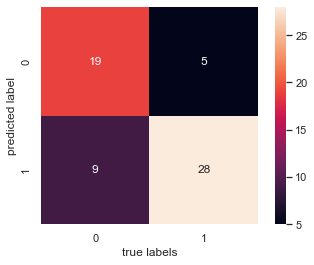

The accuracy is 0.7704918032786885
              precision    recall  f1-score   support

        -1.0       0.79      0.68      0.73        28
         1.0       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
mat = confusion_matrix(test_label, predict)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_label, predict)))
a = classification_report(test_label, predict)
print(a)

Best value for alpha: 60.000
intercept is: 2.0055378918032956
models parameters: [-2.17551640e-02 -2.94540537e-01  3.21614444e-01 -5.68399479e-03
 -2.45896978e-04 -4.39943117e-02]


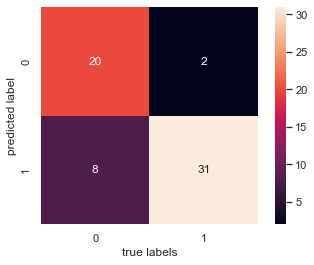

The accuracy is 0.8360655737704918
              precision    recall  f1-score   support

        -1.0       0.91      0.71      0.80        28
         1.0       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [14]:
from sklearn.linear_model import Ridge

alphas = [0.01 , 0.05 , 0.1 , 0.5 , 1.0 ,5.0, 10 ,30 , 60 , 100 ,200 , 300,400,500, 1000 , 10000]


maxacc = -1
maxal = -1
for al in alphas:
    model = Ridge(alpha = al)

    model.fit(train_features, train_label)

    predict = model.predict(test_features)
    predict[predict>=0] = 1
    predict[predict<0] = -1

    if accuracy_score(test_label, predict) > maxacc:
        maxacc = accuracy_score(test_label, predict)
        maxal = al
        
print("Best value for alpha: {:.3f}".format(maxal))
model = Ridge(alpha = maxal)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")
predict = model.predict(test_features)
predict[predict>=0] = 1
predict[predict<0] = -1

mat = confusion_matrix(test_label, predict)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_label, predict)))
a = classification_report(test_label, predict)
print(a)




Best value for alpha: 0.100
intercept is: 1.816189173206839
models parameters: [-2.07459502e-02 -1.70967443e-01  3.05338281e-01 -5.54436258e-03
 -7.89798732e-05 -0.00000000e+00]


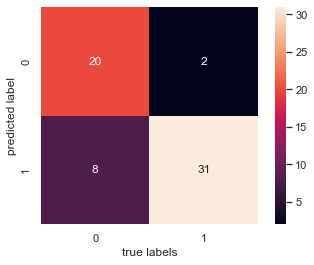

The accuracy is 0.8360655737704918
              precision    recall  f1-score   support

        -1.0       0.91      0.71      0.80        28
         1.0       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [15]:
from sklearn.linear_model import Lasso

maxacc = -1
maxa = -1

alphas = alphas = [0.001 , 0.003 , 0.01 , 0.03 , 0.1 , 0.3 ,1,3,10,30, 100,300,1000,3000]

for al in alphas:

    model = Lasso(alpha = al , max_iter = 100000)

    model.fit(train_features, train_label)

    predict = model.predict(test_features)
    predict[predict>=0] = 1
    predict[predict<0] = -1
    if accuracy_score(test_label, predict) > maxacc:
        maxacc = accuracy_score(test_label, predict)
        maxa = al
        
print("Best value for alpha: {:.3f}".format(maxa))

model = Lasso(alpha = maxa , max_iter = 100000)

model.fit(train_features, train_label)

print(f"intercept is: {model.intercept_}" )
print(f"models parameters: {model.coef_}")

predict = model.predict(test_features)
predict[predict>=0] = 1
predict[predict<0] = -1

mat = confusion_matrix(test_label, predict)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_label, predict)))
a = classification_report(test_label, predict)
print(a)